# **Welcome to the Topic Modelling Demo Notebook**

In this demo notebook we go through the `LDA_with_Grid.py` module and demonstrate its functionality.<br>


First  import some basic libraries and then install the requirements to set up the environment needed for the project.

In [7]:
# Basic libraries
import re
import os
import gc
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import time

import sys
sys.path.append("..")
from measure_time import measure_time
import pickle

In [6]:
os.getcwd()

'D:\\Seafile\\Моя библиотека\\2 semester\\DEDA\\GitHub\\Bacha fork\\DEDA_class_SoSe2023\\DEDA_class_SoSe2023_LDA_Theses\\DEDA_class_SoSe2023_LDA_MSc_Theses\\LDA_MSc_Webscraping'

In [6]:
# Picking data from Corpus Maker

with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/corpus.pkl', 'rb') as file:
    corpus = pickle.load(file)
    
with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/dictionary_token2id.pkl', 'rb') as file:
    dictionary_token2id = pickle.load(file)
    
with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/dictionary.pkl', 'rb') as file:
    dictionary = pickle.load(file)
    
with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/texts.pkl', 'rb') as file:
    texts = pickle.load(file)

with open('../LDA_MSc_3_Making_Corpus/DICT_CORP/dates.pkl', 'rb') as file:
    dates = pickle.load(file)

## LDA Class

We have defined a custom LDA class `LDA`, aimed at designing a simple,  user-friendly interface for carrying out LDA with grid search. 

As arguments, it takes `corpus`, `dictionary`, `texts` generated by the `CorpusMaker` class.

The class includes five methods:

```python

LDA.simple_fit(): 'Fits an LDA model with user\'s specifications.'
LDA.gird_search(): 'Carries out a grid search per user\'s specified parameters.'
LDA.lineplot_scores(): 'Plots coherence and perplexity scores per topic numbers.'
LDA.heatmap_scores(): 'Plots coherence scores per alpha and beta values.'
LDA.build_best_model(): 'Fits the best model obtained in grid search.'
LDA.viz(): 'Visualizes model obtained by either simple_fit or build_best_model methods.'
LDA.time_slicer(): 'Pre-processes the master\'s theses years as input for the sequential model.'
LDA.DTM(): 'Builds sequential model.'
LDA.DTM_Plot(): 'Plots the evolution of topics over time.'
```

In [ ]:
# Import the custom-made class
from LDA_with_Grid import LDA

warnings.filterwarnings("ignore")

In [3]:
LDA?

Init signature: LDA(corpus, dictionary, texts, dates)
Docstring:     
A custom LDA interface designed to carry out a grid search, find the best model and vizualize it. 
Dynamic topic modelling can be also done if grid search is carried out first. 

Args:

    corpus: A bag of words corpus (Already generated by CorpusMaker)
    dictionary: A gensim dictionary (Already generated by CorpusMaker)
    texts: All tokens (Already generated by CorpusMaker)
    dates: All dates of the papers (Already generated by CorpusMaker
    
How to use:
    
    MSc_LDA = LDA(corpus, dictionary, texts) <-- initializes the class
    m = MSc_LDA.simple_fit() <-- fits one model with custom specs
    MSc_LDA.grid_search(n_topics, alphas, betas) <-- conducts grid search
    MSc_LDA.lineplot_scores() <-- plots coherence scores from the first grid search round
    MSc_LDA.heatmap_scores() <-- plots coherence scores from the second grid search round
    m = MSc_LDA.build_best_model() <-- fits best model
    MSc_LD

### Using the `.simple_fit()`

The model fitted by the mentioned method is not included in the project results and merely serves as a demonstration of the LDA class.

In [4]:
# Initialize the class
MSc_LDA = LDA(corpus, dictionary, texts, dates)

In [6]:
# Set up a single model with following parameters 
n_top = 10
alpha_val = 'symmetric'
beta_val = 0.6

simple_m = MSc_LDA.simple_fit(n_top = n_top,
                             alpha_val = alpha_val,
                             beta_val = beta_val)


Coherence Score is: 0.4249070901873311

Perplexity Score is: -7.57871930856154

See the topics:
(0, '0.014*"model" + 0.011*"data" + 0.010*"use" + 0.010*"sentiment" + 0.008*"base" + 0.008*"time" + 0.007*"network" + 0.007*"learn" + 0.006*"word" + 0.006*"input"')
(1, '0.021*"factor" + 0.017*"return" + 0.012*"market" + 0.012*"model" + 0.011*"risk" + 0.009*"asset" + 0.007*"time" + 0.007*"cryptocurrency" + 0.006*"network" + 0.006*"data"')
(2, '0.015*"model" + 0.012*"variable" + 0.010*"data" + 0.008*"use" + 0.007*"company" + 0.007*"tree" + 0.005*"success" + 0.005*"regression" + 0.005*"funding" + 0.005*"startup"')
(3, '0.017*"data" + 0.009*"value" + 0.006*"analysis" + 0.006*"feature" + 0.005*"model" + 0.005*"area" + 0.005*"price" + 0.005*"spatial" + 0.005*"method" + 0.005*"regression"')
(4, '0.016*"portfolio" + 0.011*"data" + 0.010*"copula" + 0.009*"cluster" + 0.008*"distribution" + 0.008*"risk" + 0.008*"model" + 0.008*"return" + 0.007*"factor" + 0.007*"use"')
(5, '0.023*"frm" + 0.014*"risk" 

In [7]:
# Vizualize model
MSc_LDA.viz(model_type = 'simple') 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.068980 -0.023233       1        1  20.337515
9      0.052149 -0.064692       2        1  17.182759
0     -0.023344  0.011293       3        1  12.482963
7      0.067764 -0.005781       4        1  12.327797
2      0.009679  0.060380       5        1  10.371014
3     -0.031428  0.117982       6        1   7.504290
5      0.043347 -0.078039       7        1   6.597872
6      0.022169  0.100568       8        1   6.055265
1      0.012362 -0.069885       9        1   3.865487
8     -0.221679 -0.048594      10        1   3.275038, topic_info=        Term         Freq        Total Category  logprob  loglift
3316     frm  1233.000000  1233.000000  Default  30.0000  30.0000
1865  factor  2383.000000  2383.000000  Default  29.0000  29.0000
895     risk  3695.000000  3695.000000  Default  28.0000  28.0000
4475  copula  2011.000000  2011.000000  Default  27.0000  27.0000
886   return  3766.000000  3766.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2702  system    98.716884   665.588249  Topic10  -5.5725   1.5104
517    index   103.441847  1727.545365  Topic10  -5.5258   0.6034
1097     use   113.245262  4951.638257  Topic10  -5.4352  -0.3591
801    price   103.442693  3445.550924  Topic10  -5.5258  -0.0870
886   return    97.305215  3766.464671  Topic10  -5.5869  -0.2372

[694 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1175      1  0.941245   ac
1175      2  0.001937   ac
1175      3  0.003873   ac
1175      4  0.011620   ac
1175      5  0.003873   ac
...     ...       ...  ...
6290      2  0.058704  yes
6290      4  0.023482  yes
6290      5  0.845342  yes
6290      6  0.011741  yes
6290      8  0.035223  yes

[4211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 1, 8, 3, 4, 6, 7, 2, 9])

### Using the `.grid_search()` and `.build_best_model()`


### 1st Iteration of the Search:
Search for the optimal number of topics while fixing alpha and beta as constant.

In [8]:
# Set up parameter grid 
n_topics = range(2,30)
alpha = ['symmetric']
beta = ['auto']


In [9]:
st = time.time()

# Do the grid search
MSc_LDA.grid_search(n_topics, alpha, beta, verbose = True)

# Setting verbose = True ensures the function output in detail 

measure_time(st)


Number of topics: 2; alpha: symmetric; beta: auto; Achieved coherence score: 0.34198770374602727

Number of topics: 3; alpha: symmetric; beta: auto; Achieved coherence score: 0.324431324777173

Number of topics: 4; alpha: symmetric; beta: auto; Achieved coherence score: 0.3736310468524897

Number of topics: 5; alpha: symmetric; beta: auto; Achieved coherence score: 0.36159288166464243

Number of topics: 6; alpha: symmetric; beta: auto; Achieved coherence score: 0.40017748268360814

Number of topics: 7; alpha: symmetric; beta: auto; Achieved coherence score: 0.3933500232530847

Number of topics: 8; alpha: symmetric; beta: auto; Achieved coherence score: 0.4195835701621671

Number of topics: 9; alpha: symmetric; beta: auto; Achieved coherence score: 0.43072943463967256

Number of topics: 10; alpha: symmetric; beta: auto; Achieved coherence score: 0.45340590685054705

Number of topics: 11; alpha: symmetric; beta: auto; Achieved coherence score: 0.43789510537071535

Number of topics: 12; 

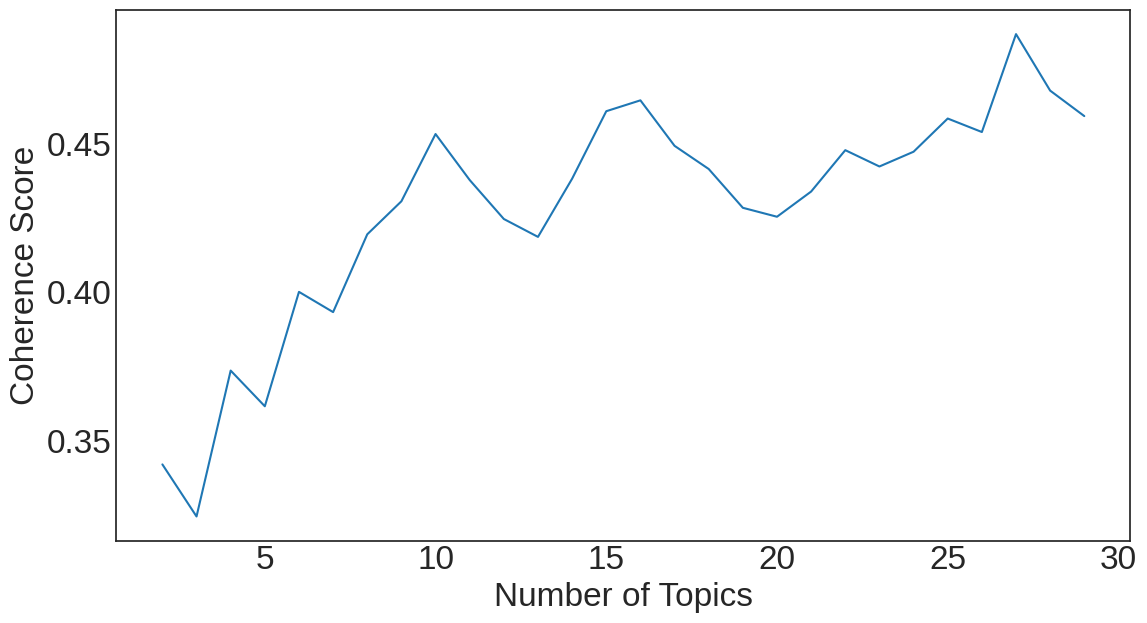

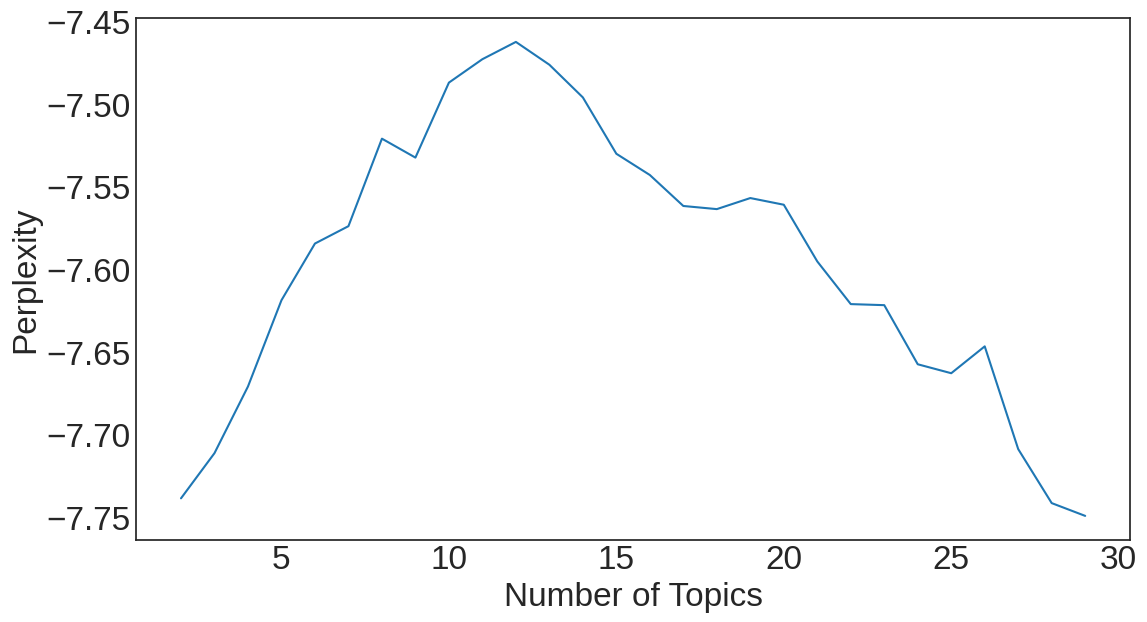

In [10]:
# Plot the scores
MSc_LDA.lineplot_scores()

In [11]:
# call best model
best_m = MSc_LDA.build_best_model()

(24, '0.020*"estimator" + 0.020*"model" + 0.019*"covariance" + 0.018*"realize" + 0.017*"volatility" + 0.017*"distribution" + 0.016*"inc" + 0.014*"matrix" + 0.014*"portfolio" + 0.012*"stock"')
(14, '0.013*"temperature" + 0.011*"use" + 0.011*"model" + 0.011*"ar" + 0.010*"var" + 0.009*"spatial" + 0.008*"landkreis" + 0.008*"country" + 0.008*"variable" + 0.007*"region"')
(26, '0.044*"svi" + 0.041*"day" + 0.038*"week" + 0.027*"model" + 0.020*"minute" + 0.020*"period" + 0.019*"di" + 0.016*"granularity" + 0.016*"learn" + 0.015*"univariate"')
(23, '0.035*"rate" + 0.030*"wealth" + 0.021*"kelly" + 0.018*"swap" + 0.016*"give" + 0.016*"time" + 0.015*"strategy" + 0.015*"trial" + 0.013*"forward" + 0.013*"mean"')
(13, '0.019*"data" + 0.011*"model" + 0.010*"feature" + 0.010*"order" + 0.009*"price" + 0.009*"time" + 0.007*"value" + 0.007*"prediction" + 0.006*"level" + 0.006*"use"')
(6, '0.043*"copula" + 0.029*"model" + 0.020*"cdo" + 0.017*"tranche" + 0.017*"correlation" + 0.015*"default" + 0.013*"csv" + 

In [12]:
# Viz best model by setting model_type = 'best'
MSc_LDA.viz(model_type = 'best')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.055066  0.009105       1        1  10.975008
3      0.012258 -0.036600       2        1   6.111763
13     0.029875 -0.136389       3        1   5.906396
22     0.075142  0.100674       4        1   5.784393
12     0.026124  0.094824       5        1   5.683985
15     0.038857 -0.137485       6        1   5.557747
9      0.071912  0.065295       7        1   5.546113
20     0.066131 -0.121006       8        1   4.927679
0      0.020077  0.157337       9        1   4.567308
26    -0.019282 -0.058036      10        1   4.278188
2      0.035294 -0.144361      11        1   4.220050
16     0.029465  0.040983      12        1   3.710669
25     0.005097  0.077985      13        1   3.556697
11     0.053785 -0.108404      14        1   3.484828
4      0.060489  0.005235      15        1   3.229010
24     0.038780  0.098474      16        1   3.181616
21     0.048116 -0.158347      17        1   2.860438
14     0.019490  0.059487      18        1   2.771867
17     0.122287 -0.008035      19        1   2.692407
7      0.093295 -0.012875      20        1   2.367471
5      0.109234  0.036191      21        1   2.203173
19    -0.015345  0.008402      22        1   1.870975
6     -0.068348  0.108212      23        1   1.686802
23    -0.072931  0.172868      24        1   1.416662
8     -0.228253 -0.053475      25        1   0.843043
10    -0.267819 -0.059108      26        1   0.498673
1     -0.338795 -0.000952      27        1   0.067040, topic_info=                 Term         Freq        Total Category  logprob  loglift
4475           copula  2816.000000  2816.000000  Default  30.0000  30.0000
1060             time  5036.000000  5036.000000  Default  29.0000  29.0000
736            option  1552.000000  1552.000000  Default  28.0000  28.0000
10516             svi  1503.000000  1503.000000  Default  27.0000  27.0000
3316              frm  1180.000000  1180.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
998             stock     7.284625  1353.342004  Topic27  -4.2902   2.0831
600            liquid     3.542807   123.440837  Topic27  -5.0111   3.7568
667             month     3.042776   391.327215  Topic27  -5.1632   2.4509
933    semiparametric     2.621016   138.374675  Topic27  -5.3124   3.3412
1315         deutsche     2.253249    69.061371  Topic27  -5.4636   3.8850

[1916 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
5206      17  0.808460  abnormal
5206      19  0.164218  abnormal
1175       1  0.003683        ac
1175       3  0.018415        ac
1175       6  0.014732        ac
...      ...       ...       ...
1172      17  0.011357        zu
1172      20  0.007572        zu
1172      23  0.011357        zu
11933      1  0.975481        zv
9660      14  0.811261  zwischen

[8484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 4, 14, 23, 13, 16, 10, 21, 1, 27, 3, 17, 26, 12, 5, 25, 22, 15, 18, 8, 6, 20, 7, 24, 9, 11, 2])

### 2nd Iteration of the Search:
Fix the number of topics as obtained from the previous round and search for optimal $\alpha$ and $\beta$ values.

In [13]:
# Set up parameter grid 

n_topics = [12]
alphas = np.arange(0.1, 1, 0.2).tolist()
betas = np.arange(0.1, 1, 0.2).tolist()

# Append symmetric and automatic alpha and beta values to the grid manually.
alphas.append('symmetric')
betas.append('auto')

In [14]:
st = time.time()

# Remove the assigned best score from the previous iteration
MSc_LDA.best_score = -1

# Do the grid search
MSc_LDA.grid_search(n_topics, alphas, betas, verbose = True)

measure_time(st)


Number of topics: 12; alpha: 0.1; beta: 0.1; Achieved coherence score: 0.42875795180974463

Number of topics: 12; alpha: 0.1; beta: 0.30000000000000004; Achieved coherence score: 0.45507143824669694

Number of topics: 12; alpha: 0.1; beta: 0.5000000000000001; Achieved coherence score: 0.44785493120549

Number of topics: 12; alpha: 0.1; beta: 0.7000000000000001; Achieved coherence score: 0.4496650058547567

Number of topics: 12; alpha: 0.1; beta: 0.9000000000000001; Achieved coherence score: 0.44259227044740435

Number of topics: 12; alpha: 0.1; beta: auto; Achieved coherence score: 0.42475014734765537

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.1; Achieved coherence score: 0.42975198273614046

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.30000000000000004; Achieved coherence score: 0.4570526099744527

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.5000000000000001; Achieved coherence score: 0.44485664204894776

Number of topics: 12; alpha: 0.3000

In [15]:
# call best model
best_m = MSc_LDA.build_best_model()

(0, '0.016*"model" + 0.013*"time" + 0.012*"data" + 0.012*"network" + 0.010*"prediction" + 0.010*"layer" + 0.009*"order" + 0.009*"return" + 0.008*"learn" + 0.008*"price"')
(1, '0.013*"crypto" + 0.013*"function" + 0.011*"contract" + 0.010*"currency" + 0.010*"blockchain" + 0.009*"value" + 0.008*"smart" + 0.007*"token" + 0.007*"address" + 0.007*"coin"')
(2, '0.015*"model" + 0.012*"variable" + 0.010*"data" + 0.009*"use" + 0.007*"value" + 0.006*"test" + 0.006*"one" + 0.005*"result" + 0.005*"function" + 0.005*"set"')
(3, '0.013*"data" + 0.010*"function" + 0.009*"energy" + 0.008*"use" + 0.007*"inc" + 0.007*"consumption" + 0.006*"matrix" + 0.006*"may" + 0.006*"value" + 0.006*"error"')
(4, '0.022*"portfolio" + 0.015*"data" + 0.012*"cluster" + 0.008*"return" + 0.008*"weight" + 0.008*"distribution" + 0.008*"risk" + 0.008*"pc" + 0.008*"variance" + 0.007*"number"')
(5, '0.029*"frm" + 0.016*"risk" + 0.013*"private" + 0.012*"return" + 0.011*"equity" + 0.010*"financial" + 0.010*"test" + 0.009*"market" 

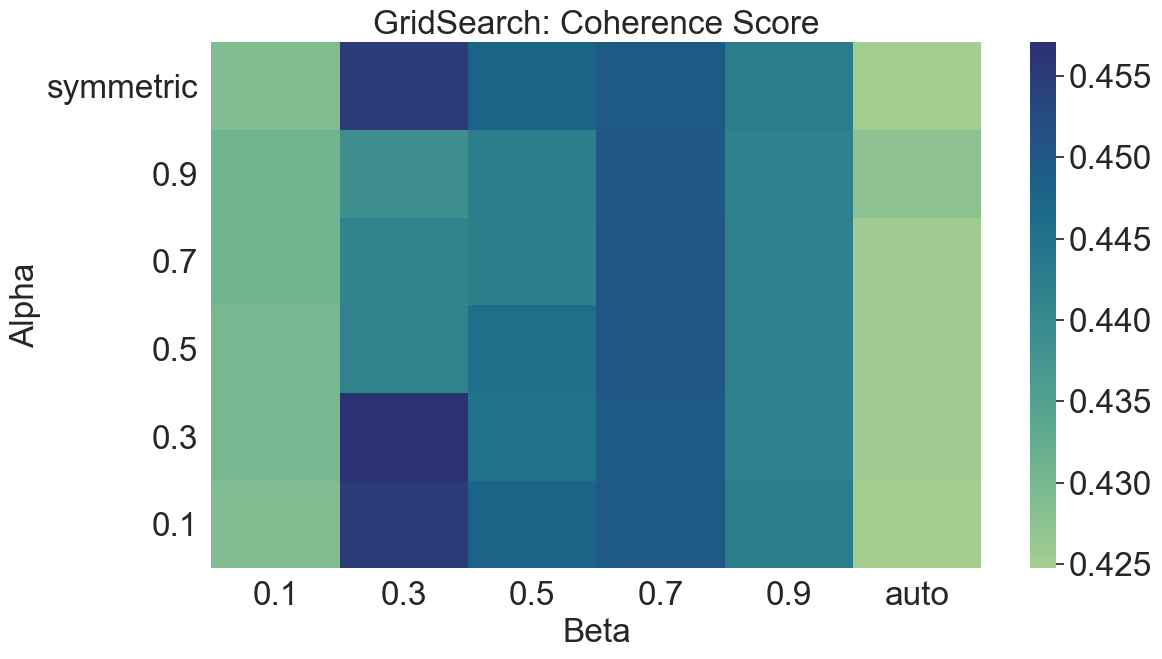

In [5]:
# Visuzalize results of the grid search
MSc_LDA.heatmap_scores()

warnings.filterwarnings("ignore")

In [16]:
# Viz best model by setting model_type = 'best'
MSc_LDA.viz(model_type = 'best')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.002167  0.005164       1        1  19.398393
7     -0.065233  0.044982       2        1  16.035556
9     -0.061998  0.067980       3        1  11.606569
4     -0.100241  0.029926       4        1  10.094944
10     0.082912 -0.007587       5        1   7.565386
6     -0.103808  0.007057       6        1   7.019833
8     -0.039452 -0.205761       7        1   6.219094
3     -0.018774 -0.048715       8        1   6.019357
5     -0.055831  0.099495       9        1   4.913046
0      0.091761 -0.073656      10        1   4.484769
11     0.092839 -0.002323      11        1   3.826129
1      0.179994  0.083439      12        1   2.816922, topic_info=            Term         Freq        Total Category  logprob  loglift
4475      copula  2286.000000  2286.000000  Default  30.0000  30.0000
10516        svi  1348.000000  1348.000000  Default  29.0000  29.0000
3316         frm  1121.000000  1121.000000  Default  28.0000  28.0000
783    portfolio  2662.000000  2662.000000  Default  27.0000  27.0000
1133        week  1196.000000  1196.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
625       market   118.232558  4027.423176  Topic12  -5.2414   0.0413
875      require    77.567560   438.264653  Topic12  -5.6629   1.8379
1097         use   102.037387  5197.766542  Topic12  -5.3888  -0.3611
801        price    95.988128  3266.745056  Topic12  -5.4499   0.0422
886       return    88.777297  4313.485062  Topic12  -5.5280  -0.3138

[856 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5206      1  0.010974  abnormal
5206      2  0.395060  abnormal
5206      6  0.010974  abnormal
5206      7  0.010974  abnormal
5206      8  0.010974  abnormal
...     ...       ...       ...
1172      8  0.024482        zu
1172      9  0.016321        zu
1172     10  0.024482        zu
1172     11  0.016321        zu
1172     12  0.289700        zu

[4756 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 10, 5, 11, 7, 9, 4, 6, 1, 12, 2])

# Step 5) Dynamic Topic Modeling Using `.DTM()` Method

To run the DTM, there are two pre-requisites: 
- The user should have conducted a grid search and received the parameters of the best model found during search.
- The user should preprocess the year batches as input for the dynamic topic model. This can be done through the `.time_slicer()` method included in the LDA class.

In [17]:
# Inspect the time slicer which will set up batches to be used in sequential modeling
MSc_LDA.time_slicer?

Signature: MSc_LDA.time_slicer(year_batches)
Docstring:
Takes a list of several year ranges and converts them into time slices as an input for dtm.

Args:
    year_batches: List of several year ranges
Returns:
    time_slice: input for dtm
    
Example use:
    Set up variable: 
        year_batches = [range(2002,2009), range(2009,2016), range(2016, 2020), range(2020, 2024)]
    Run method:
        time_slicer(year_btaches)
File:      ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_with_Grid.py
Type:      method

In [18]:
# Set up year_batches as input to the method
year_batches = [range(2002,2009), range(2009,2016), range(2016, 2020), range(2020, 2024)]
# Run the method
MSc_LDA.time_slicer(year_batches)

[29, 50, 24, 18]

Having preprocessed the year batches, now it is possible to move on to dynamic topic modelling.

In [19]:
# Inspect the method
MSc_LDA.DTM?

Signature: MSc_LDA.DTM(year_batches)
Docstring:
Builds a DTM model following the best parameters received from grid_search. Note: function will not work without conducting a grid search.

Inputs:
    year_batches: List of several year ranges
Returns:
    Sequential model
File:      ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_with_Grid.py
Type:      method

In [20]:
st = time.time()

# Run the DTM
MSc_DTM = MSc_LDA.DTM(year_batches)

measure_time(st)


The model successfully built. Currently processing its output...

All done!


### Using the `.DTM_Plot()` Method:
The method takes only one argument, the folder where the previous method automatically saved the topics as `.csv` files.

Plots top 5 terms in each topic. If top 5 terms changed from period to period, plots each term that has ever been in top 5 for the topic.

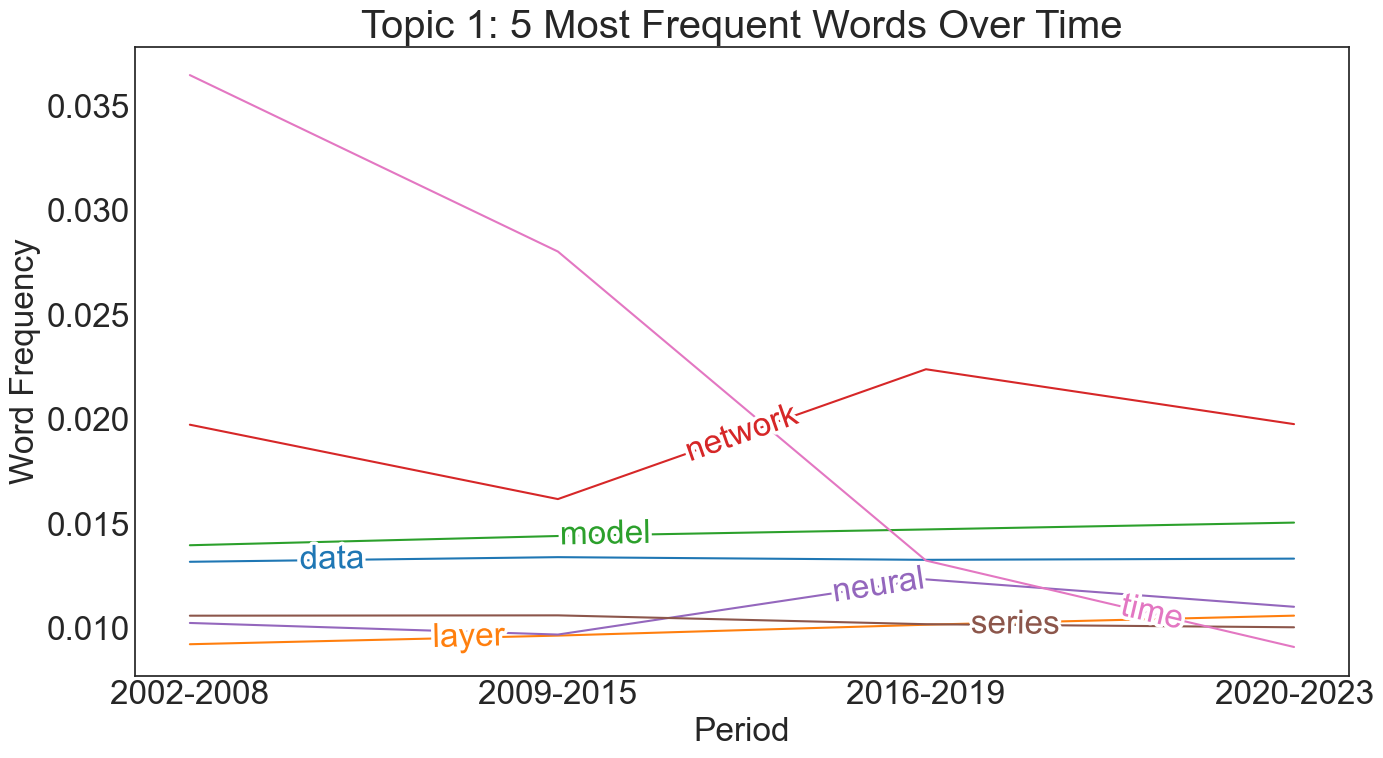

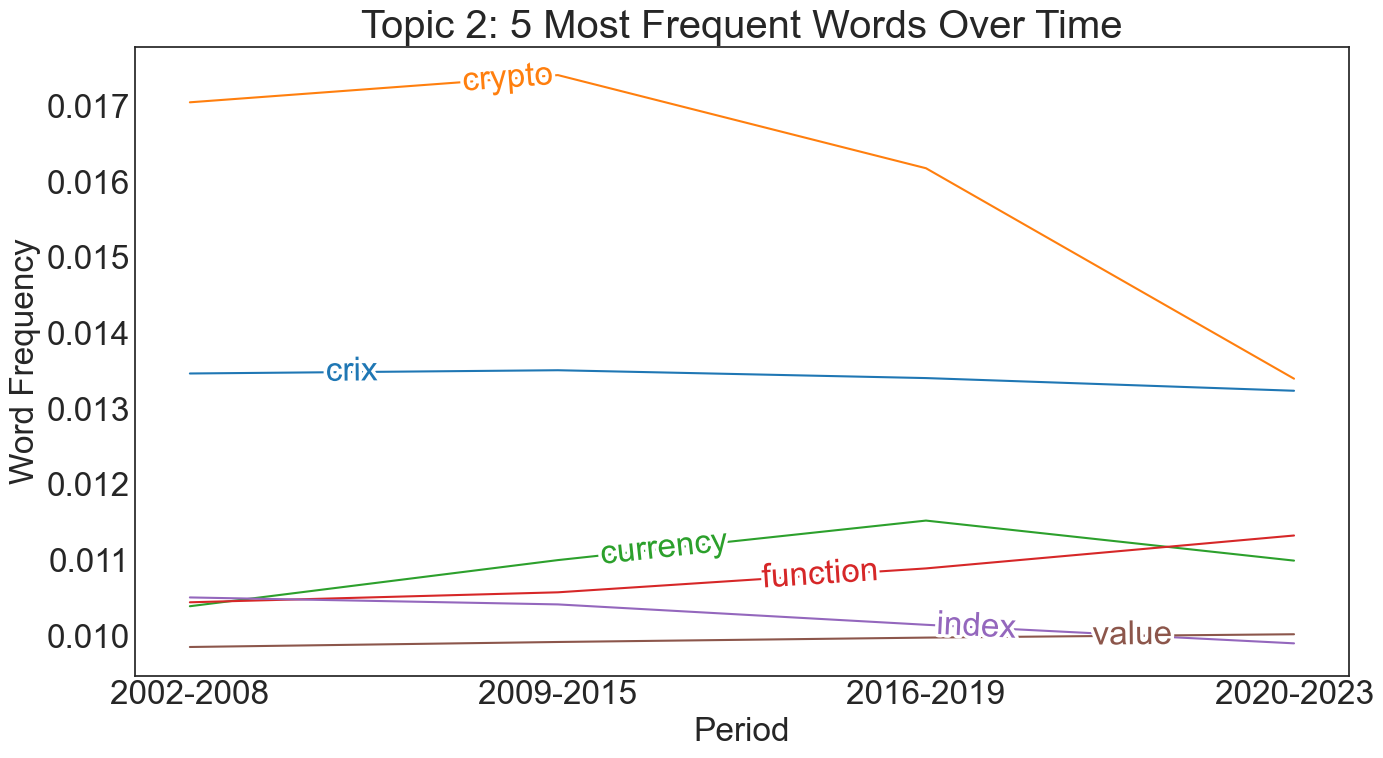

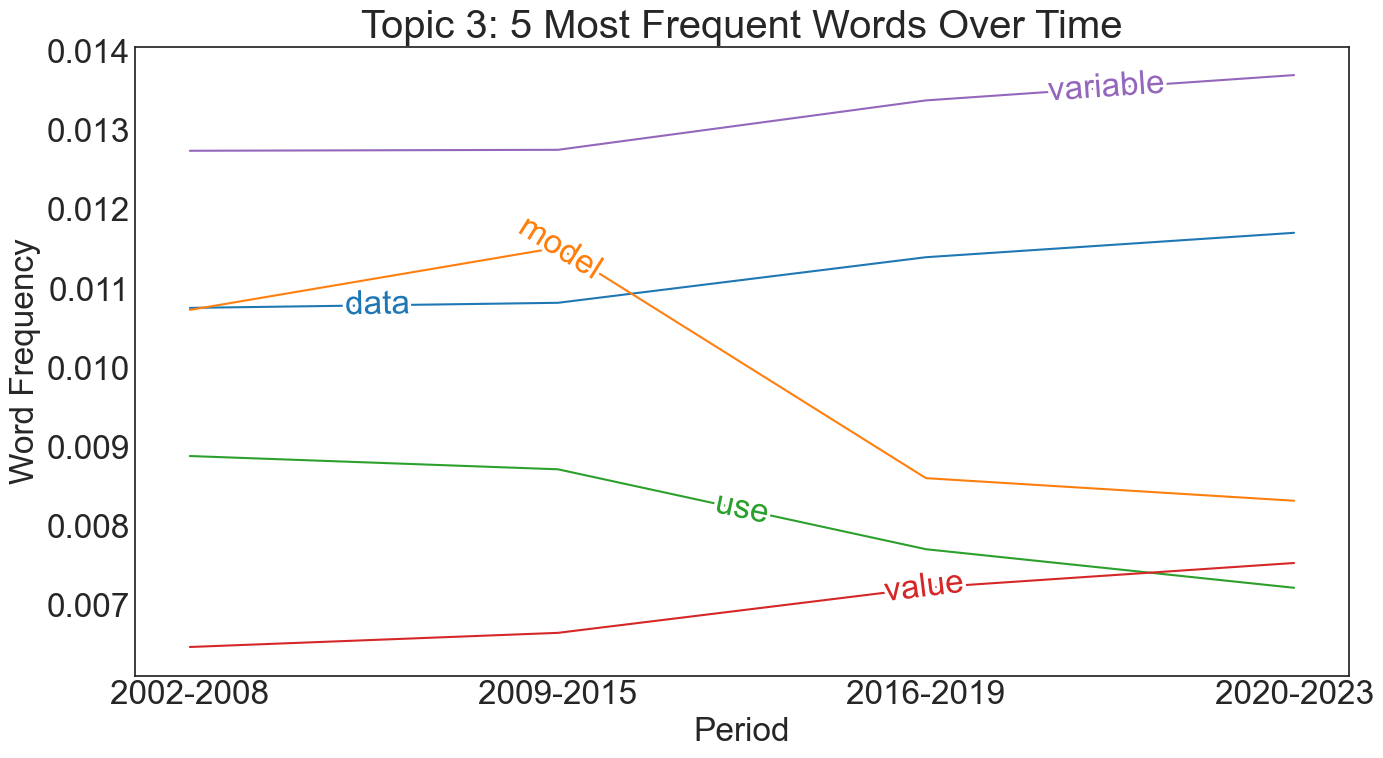

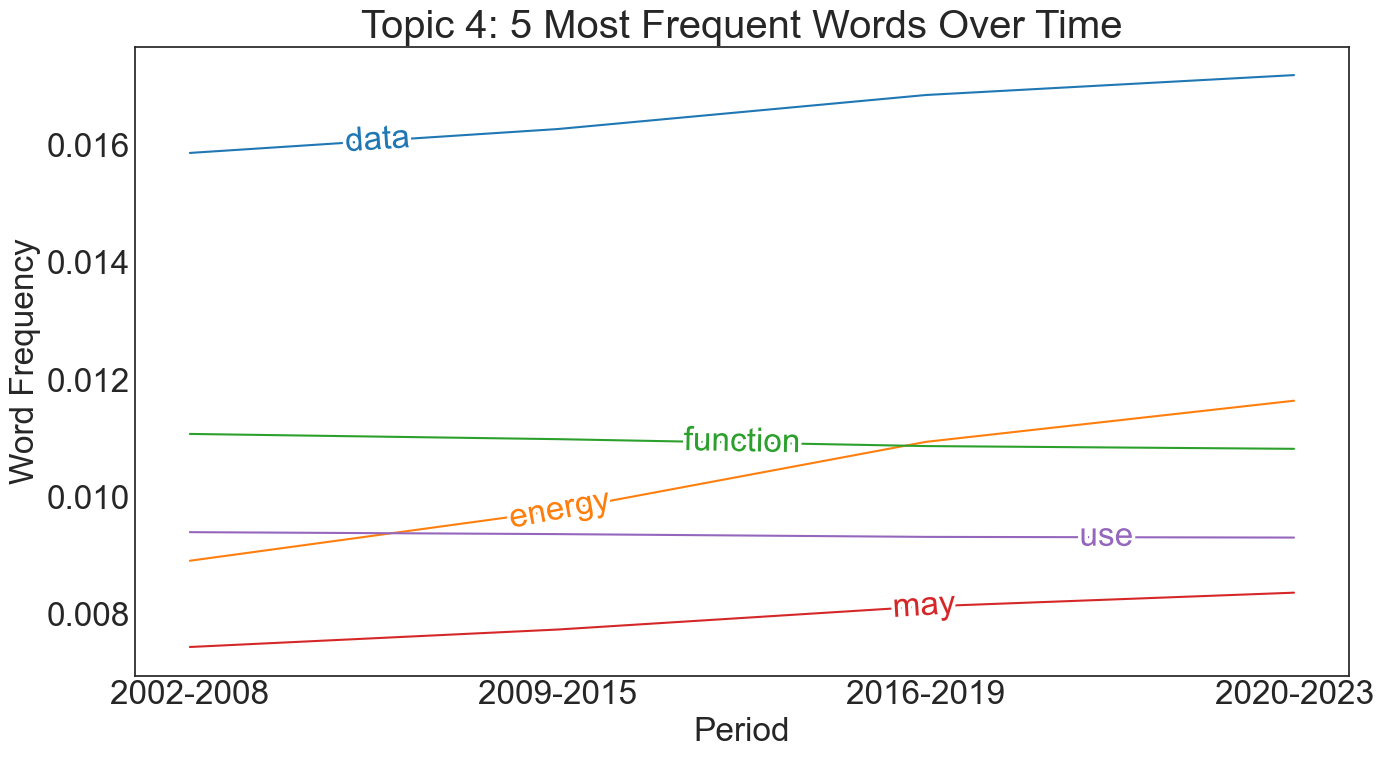

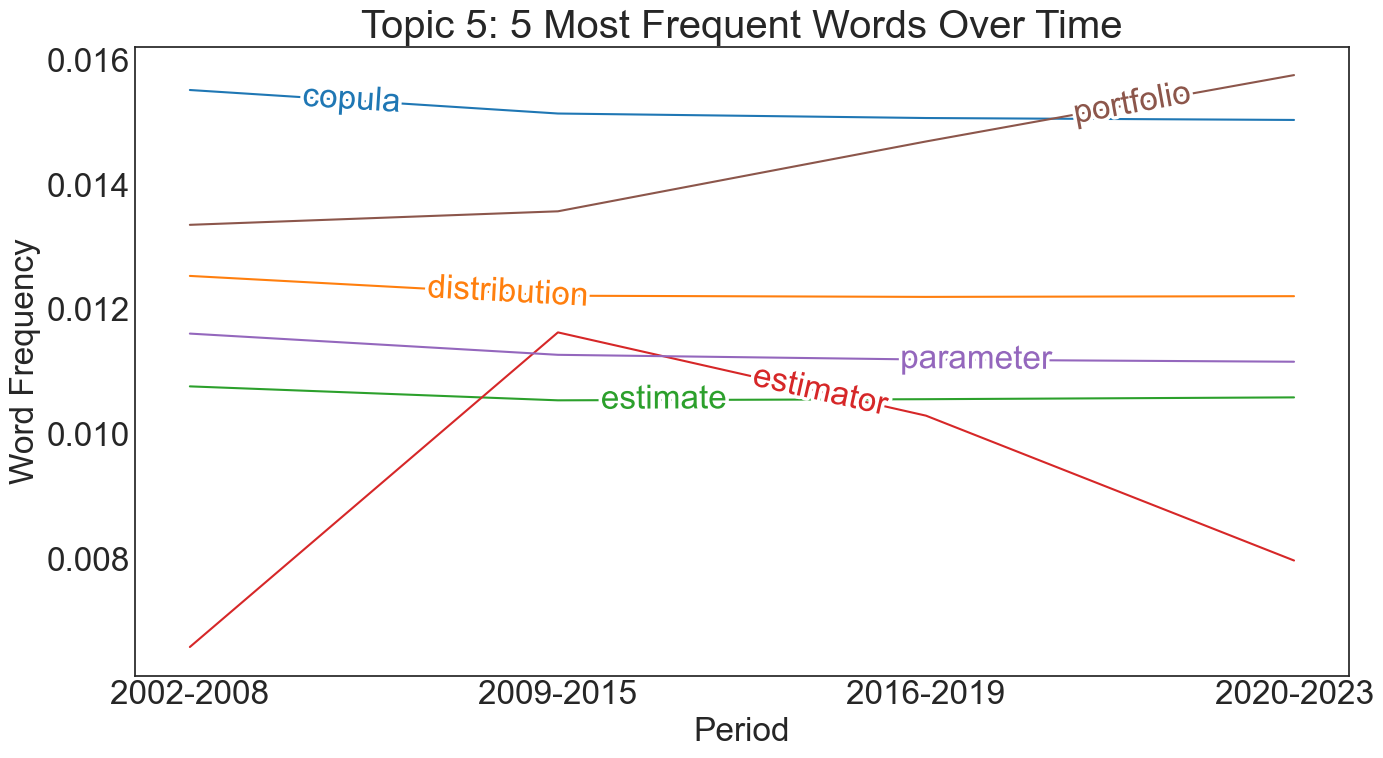

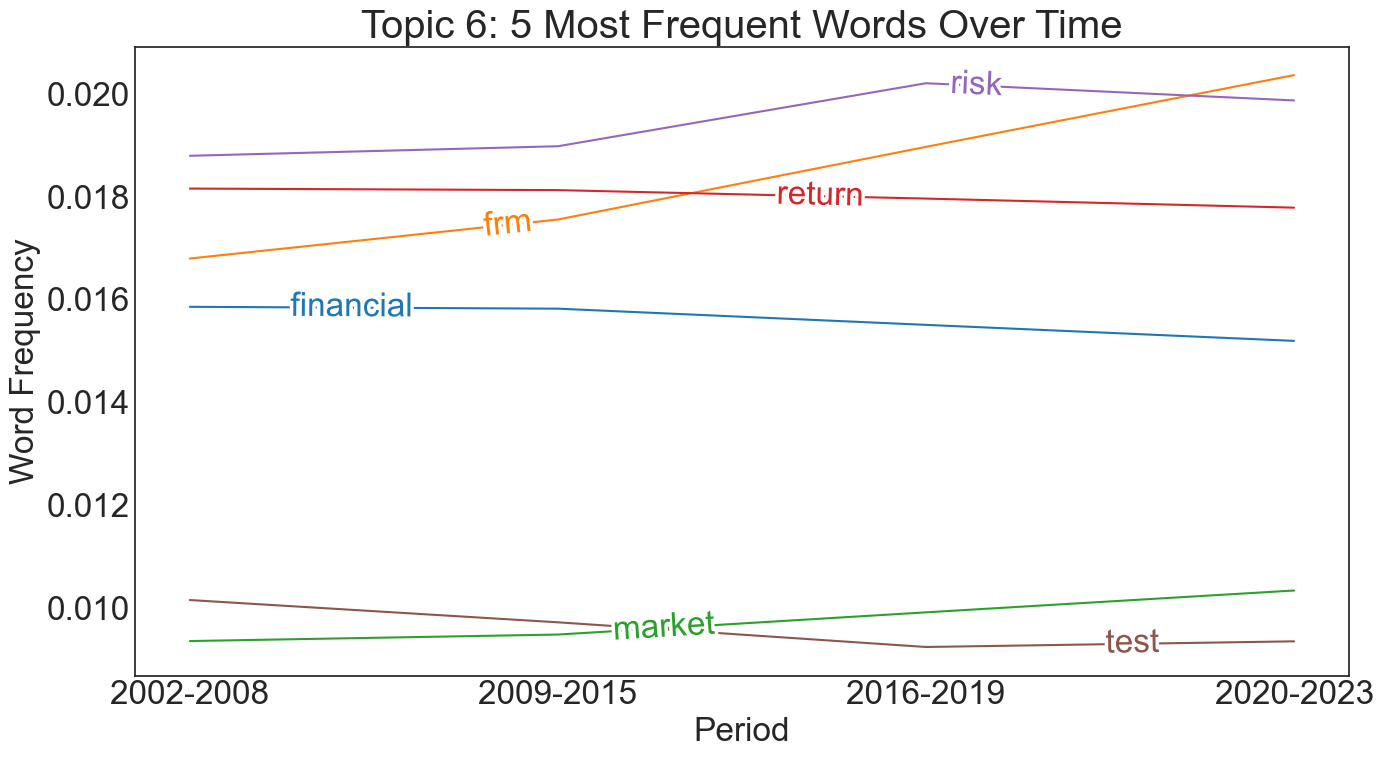

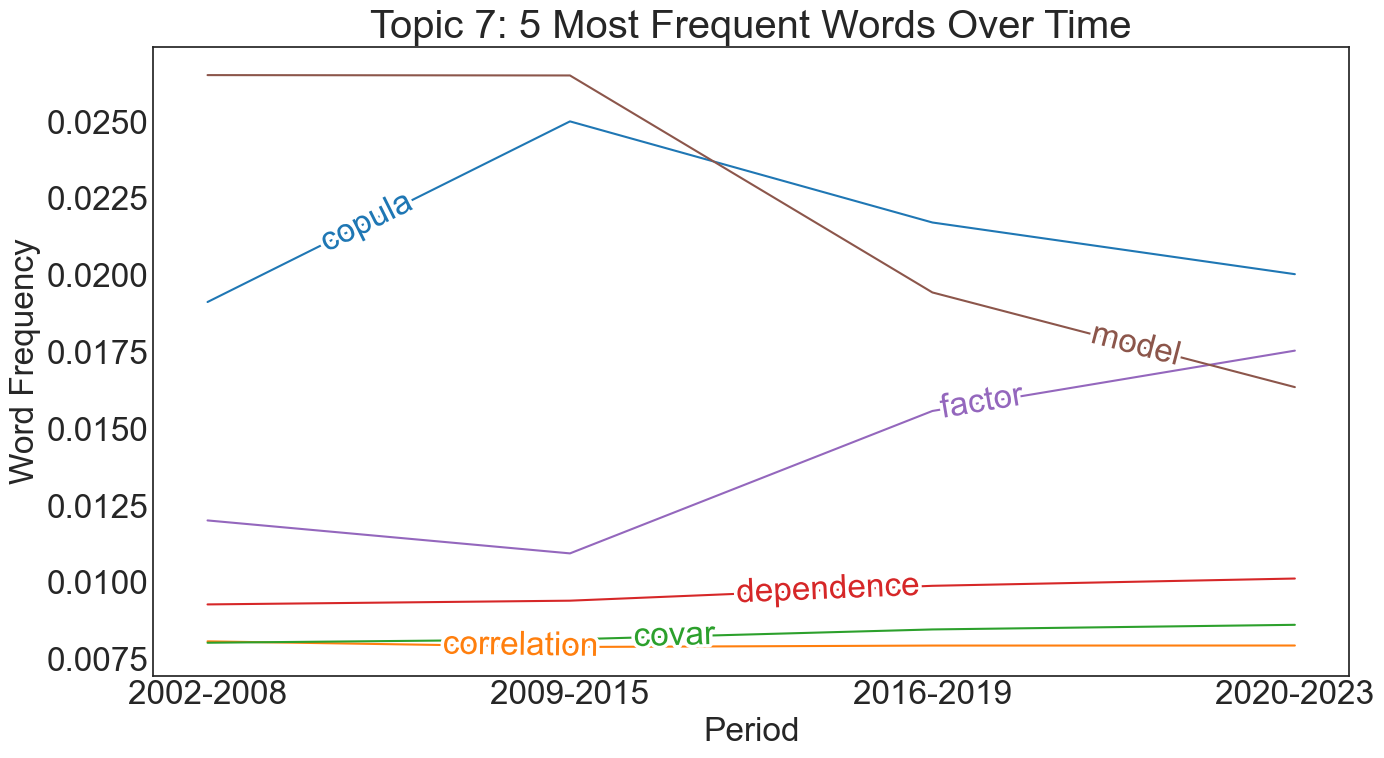

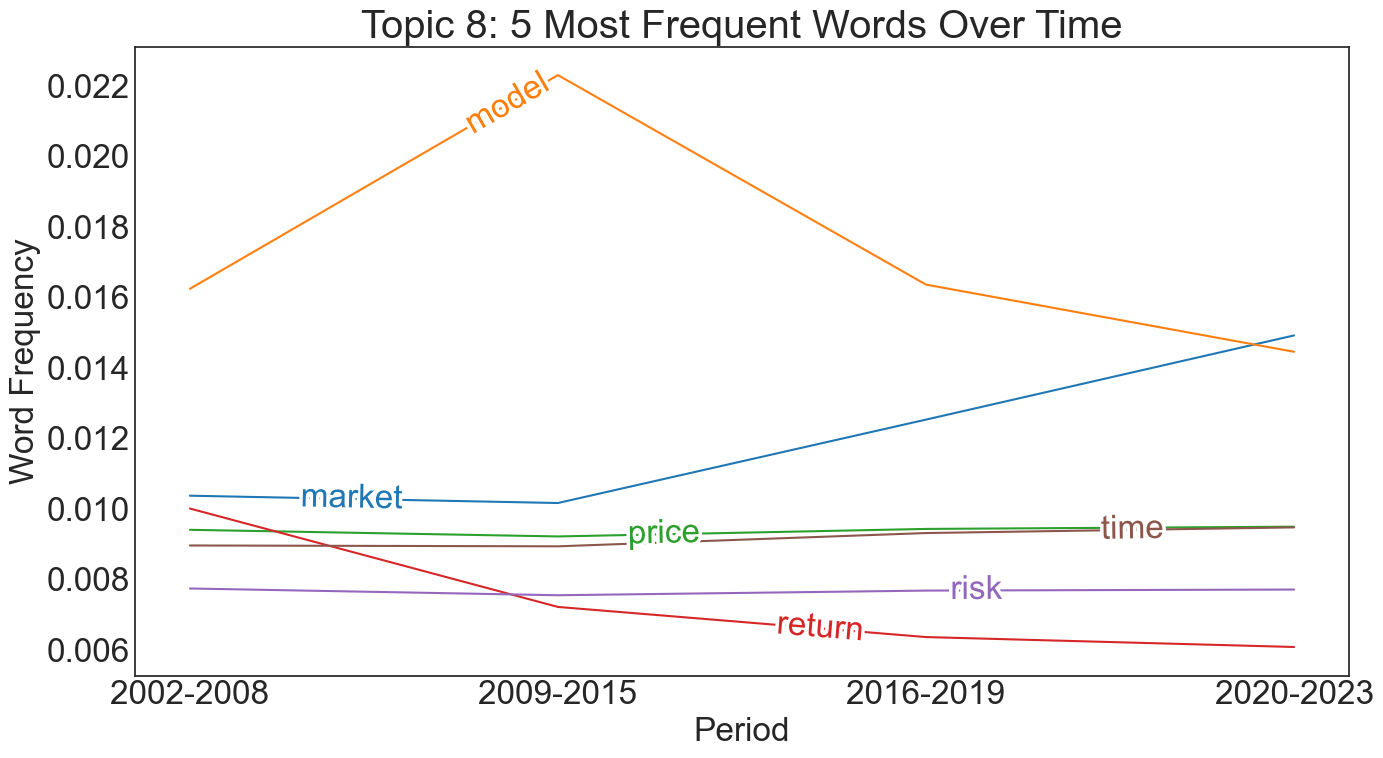

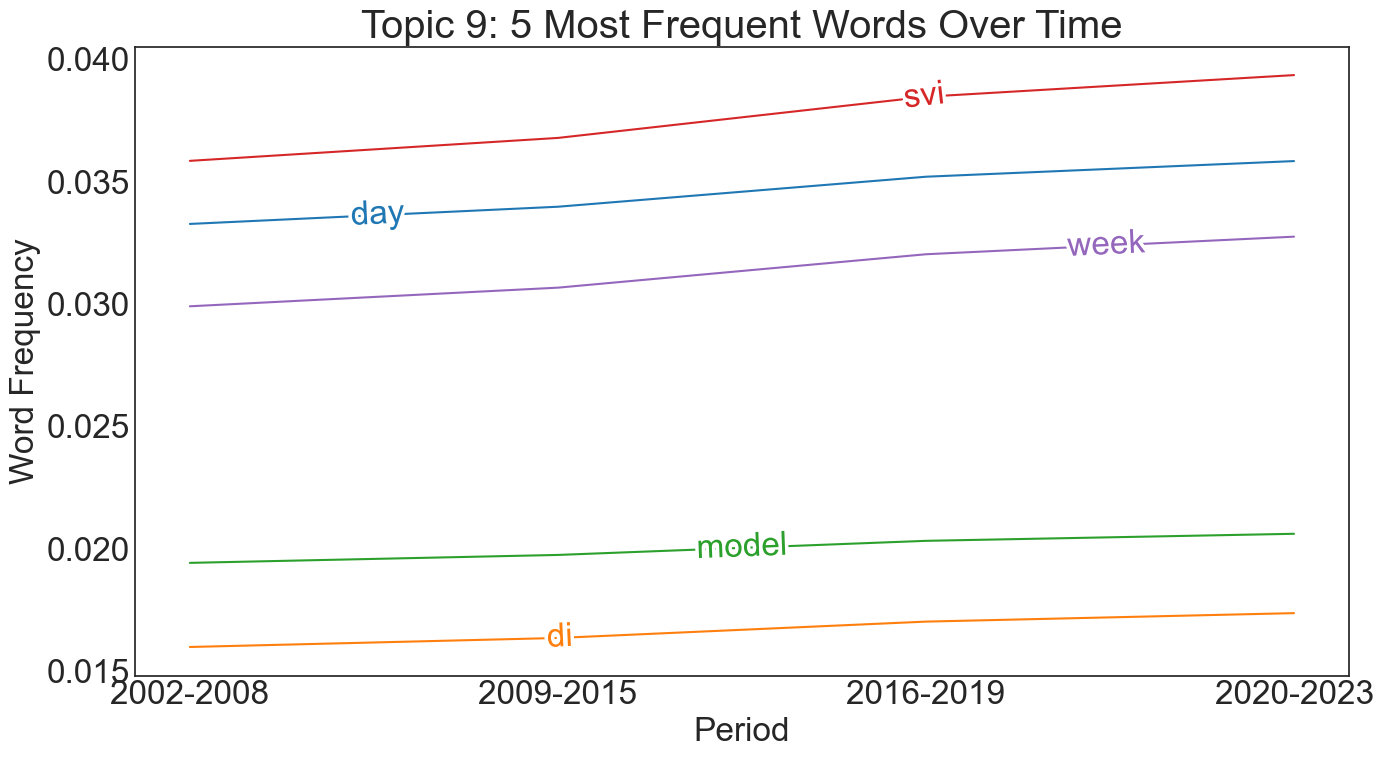

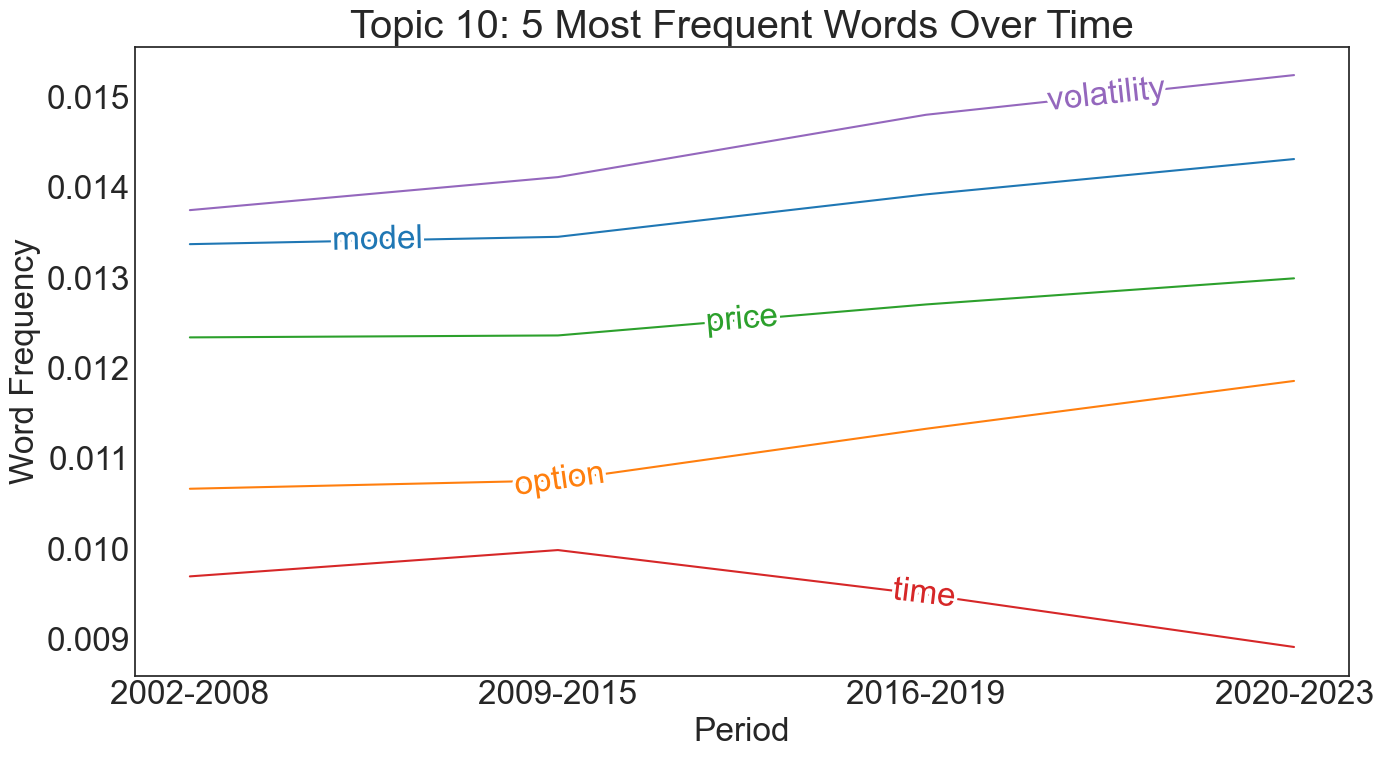

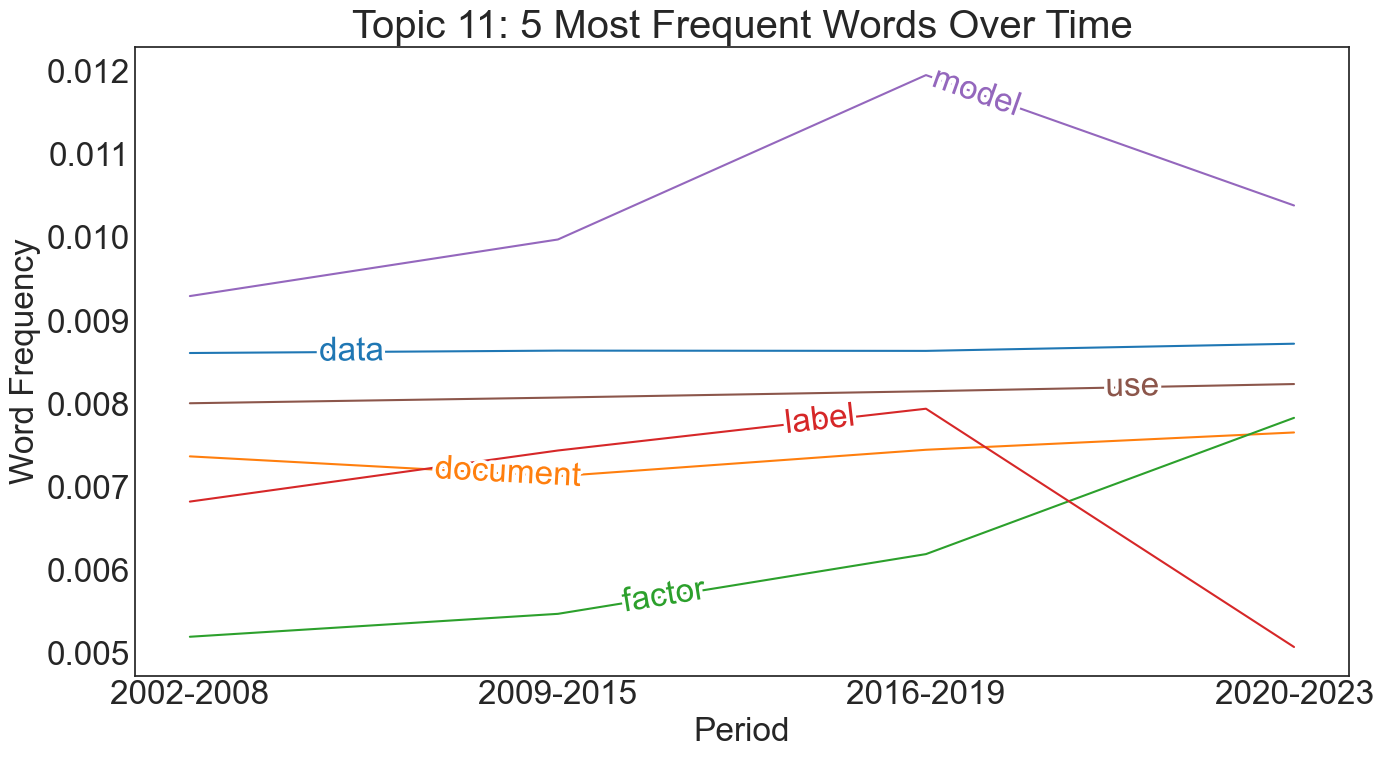

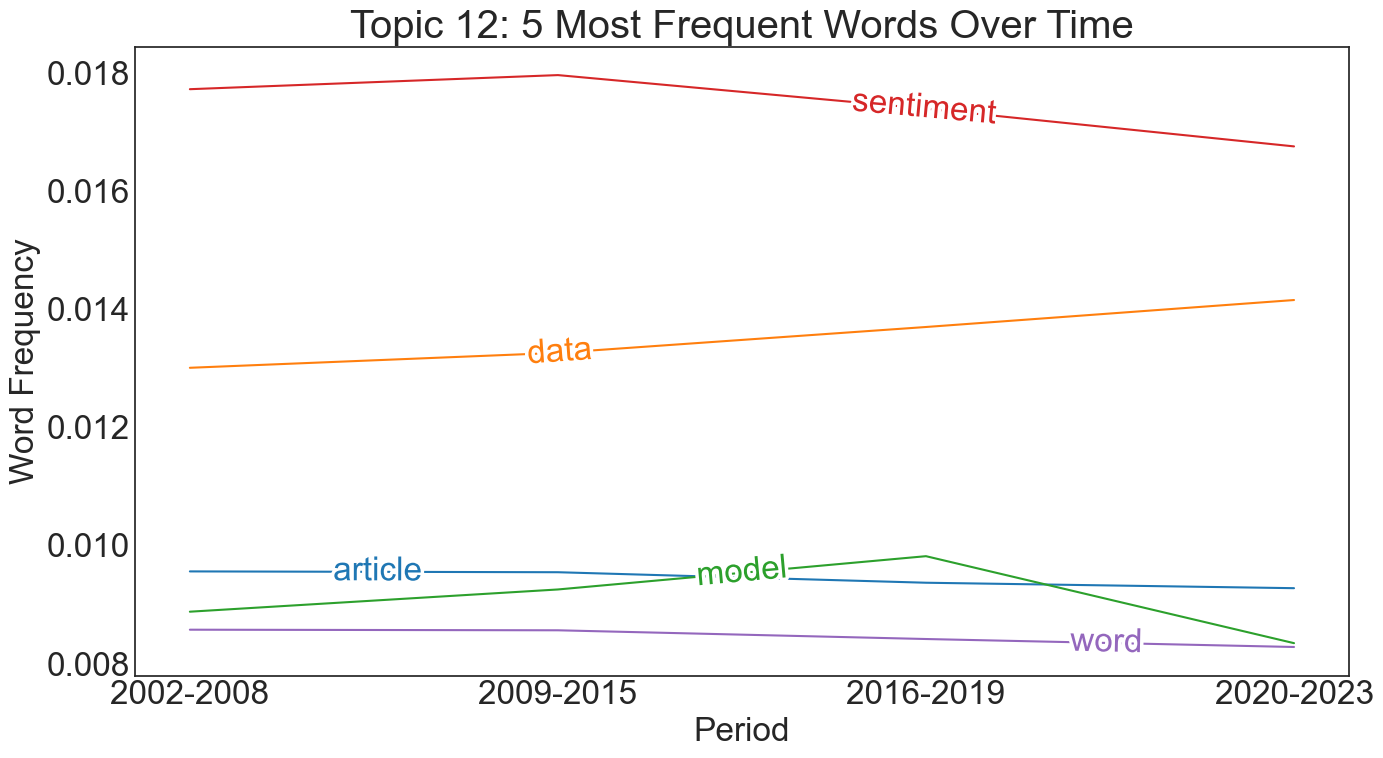

In [6]:
# Specify the input folder
topic_folder = 'Topics_CSVs/topics_words_time'
# Run the method
MSc_LDA.DTM_Plot(topic_folder = topic_folder)

### *Reproducibility disclaimer:*<br>
While reproducibility is ensured by setting random states where possible, the results cannot be replicated by other's via merely scraping the master's theses as the project included theses scanned from physical copies (not present on the HU website) in its dataset. 